In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import matplotlib.pyplot as plt
import keras
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/DATA255/HW8/Google_Stock_Price_Train.csv")
print('Number of rows and columns:', df.shape)
df.head(5)

Number of rows and columns: (1258, 6)


,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [ ]:
num_rows = df.shape[0]
train_size = int(num_rows * 0.8)

training_set = df.iloc[:train_size, 1:2].values
test_set = df.iloc[train_size:, 1:2].values

In [ ]:
# Feature Scaling
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)
# Creating a data structure with 60 time-steps and 1 output
X_train = []
y_train = []
for i in range(60, 800):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
print(X_train.shape)
#Shape = (740, 60, 1) (values, time-step,label)

(740, 60, 1)


In [ ]:
model = Sequential()
#Adding the first LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model.add(Dropout(0.2))
# Adding a second LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
# Adding a third LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
# Adding a fourth LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50))
model.add(Dropout(0.2))
# Adding the output layer
model.add(Dense(units = 1))

# Compiling the RNN
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
model.fit(X_train, y_train, epochs = 30, batch_size = 32)

Epoch 1/30
24/24 [==============================] - 20s 127ms/step - loss: 0.0281
Epoch 2/30
24/24 [==============================] - 4s 167ms/step - loss: 0.0046
Epoch 3/30
24/24 [==============================] - 3s 112ms/step - loss: 0.0043
Epoch 4/30
24/24 [==============================] - 3s 113ms/step - loss: 0.0036
Epoch 5/30
24/24 [==============================] - 3s 114ms/step - loss: 0.0037
Epoch 6/30
24/24 [==============================] - 4s 155ms/step - loss: 0.0028
Epoch 7/30
24/24 [==============================] - 3s 137ms/step - loss: 0.0029
Epoch 8/30
24/24 [==============================] - 3s 113ms/step - loss: 0.0030
Epoch 9/30
24/24 [==============================] - 4s 150ms/step - loss: 0.0029
Epoch 10/30
24/24 [==============================] - 6s 272ms/step - loss: 0.0029
Epoch 11/30
24/24 [==============================] - 3s 112ms/step - loss: 0.0026
Epoch 12/30
24/24 [==============================] - 3s 111ms/step - loss: 0.0030
Epoch 13/30
24/24 [=====

In [ ]:
dataset_train = df.iloc[:train_size, 1:2]
dataset_test = df.iloc[train_size:, 1:2]
dataset_total = pd.concat((dataset_train, dataset_test), axis=0)

sc = MinMaxScaler(feature_range=(0, 1))
dataset_total_scaled = sc.fit_transform(dataset_total)

inputs = dataset_total_scaled[len(dataset_total_scaled) - len(dataset_test) - 60:]

X_test = []
for i in range(60, len(inputs)):
    X_test.append(inputs[i-60:i, 0])

X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))  # Reshaping for LSTM

print(X_test.shape)

(252, 60, 1)


In [ ]:
predicted_stock_price = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

8/8 [==============================] - 2s 34ms/step


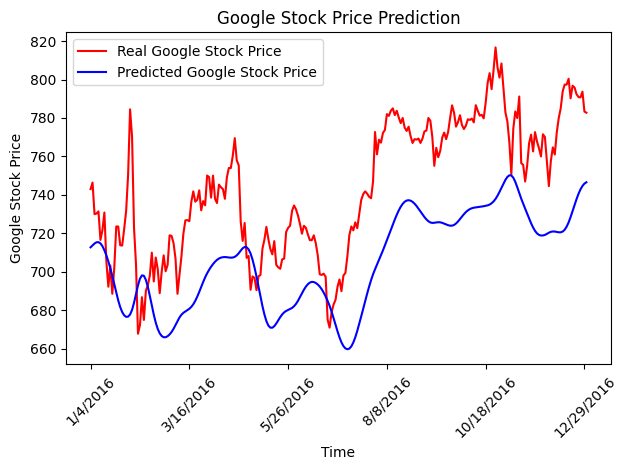

In [ ]:
# Visualising the results
test_dates = df.loc[train_size:, 'Date']
plt.plot(test_dates, dataset_test.values, color='red', label='Real Google Stock Price')
plt.plot(test_dates[:len(predicted_stock_price)], predicted_stock_price, color='blue', label='Predicted Google Stock Price')
plt.xticks(np.arange(0, len(test_dates), step=50), rotation=45)
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.tight_layout()
plt.show()

The model's guesses are close to the real prices, but it doesn't catch the big jumps and drops perfectly. So, the model is good at following the overall ups and downs but needs to get better at guessing how much the price will change.